# Entrenamiento de modelo de regresión linear con Scikit-Learn

Como primer paso, se realizan todas las importaciones necesarias para el desarrollo del trabajo

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
df = pd.read_csv("calories.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


La columna 'Gender' es una columna `categórica`, la convertimos a numérica indicancod que los Hombres tienen el número 0 y las mujeres el número 1

In [ ]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df.info()

In [21]:
X = df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']


Luego de seleccionar las columnas, se realiza un entrenamiento y un testeo utilizando `train_test_split`
### train_test_split: 
El funcionamiento de este método es el de dividir un conjunto de datos en dos bloques de entrenamiento y prueba (train and test).
* Un **conjunto de entrenamiento** para que el modelo aprenda
* Un **conjunto de prueba** para evaluar si el modelo aprendió correctamente

### Componentes del train_test_split:
Como se puede observar, tenemos 4 variables, son los conjuntos de entrenamiento y prueba:
* X_train
* X_test
* y_train
* y_test
  
Y también están los siguientes parámetros
* test_size: corresponde a un 20% (0.2) de los datos reservador para pruebas y el 80% para entrenamiento
* random_state: asegura que la división sea siempre igual si se vuelve a ejecutar


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Se entrena el modelo utilizando las variables de entrenamiento

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Se hace una predicción con los datos de testeo

In [25]:
y_pred = model.predict(X_test)


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 131.99574575081695
Coeficiente de determinación (R²): 0.9672937151257295


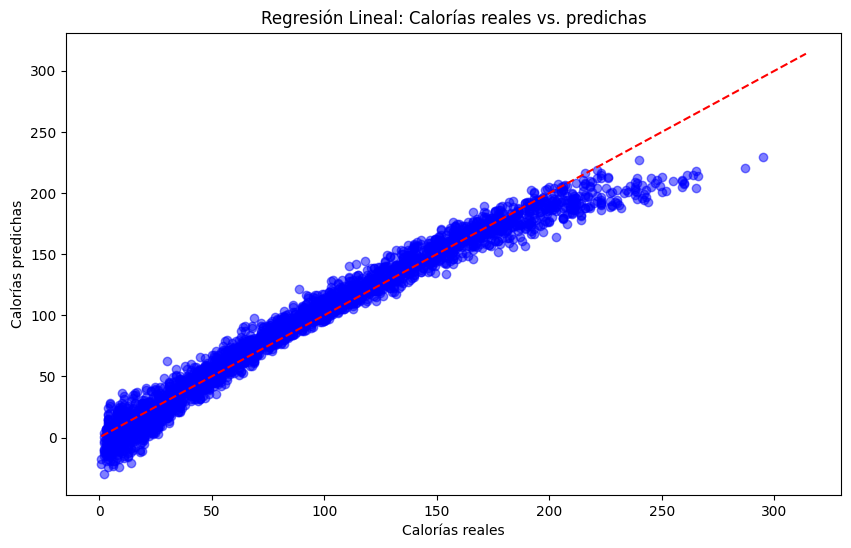

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea ideal
plt.xlabel('Calorías reales')
plt.ylabel('Calorías predichas')
plt.title('Regresión Lineal: Calorías reales vs. predichas')
plt.show()
